In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import os

In [8]:
# Define data directories
train_dir = r'C:\Users\USER\Downloads\minipro\plant_disease_detection-main\archive (2)\Test\Test'
test_dir = r'C:\Users\USER\Downloads\minipro\plant_disease_detection-main\archive (2)\Train\Train'


In [9]:
# Define classes
classes = {'Healthy': 0, 'Powdery': 1, 'Rust': 2}


In [10]:
# Load images and labels
X = []
Y = []
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])


In [11]:
# Convert lists to numpy arrays
X = np.array(X)
Y = np.array(Y)


In [12]:
# Data preprocessing
X_updated = X.reshape(len(X), -1) / 255.0

In [13]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_updated, Y, test_size=0.2, random_state=10)


In [14]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [15]:
# Fit PCA on training data
pca = PCA(0.98)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)


In [16]:
# Train SVM model
svm_model = SVC()
svm_model.fit(pca_train, y_train)

SVC()

In [17]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(pca_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Ensemble with Voting Classifier
voting_clf = VotingClassifier([('svm', svm_model), ('random_forest', rf_model)], voting='hard')
voting_clf.fit(pca_train, y_train)

VotingClassifier(estimators=[('svm', SVC()),
                             ('random_forest',
                              RandomForestClassifier(random_state=42))])

In [19]:
# Cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(voting_clf, pca_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.66666667 0.54166667 0.58333333 0.625      0.58333333]
Mean accuracy: 0.6


In [20]:
# Confusion matrix
y_pred = voting_clf.predict(pca_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(conf_matrix)

Confusion matrix:
[[8 1 1]
 [8 5 0]
 [0 3 4]]


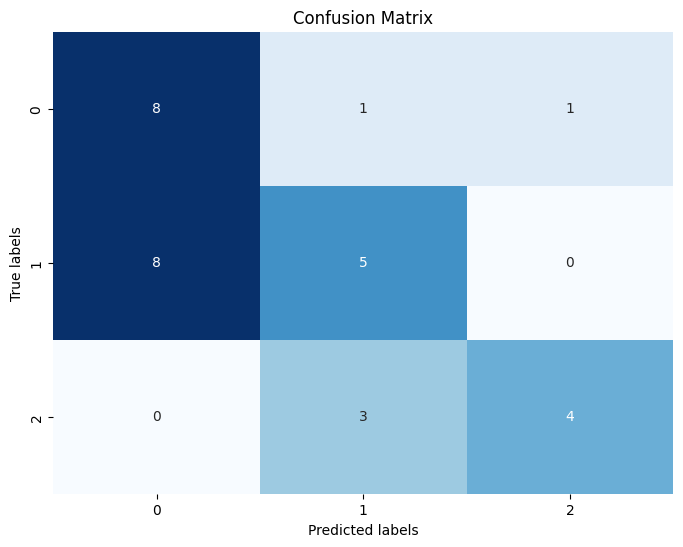

In [21]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


In [22]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5666666666666667


In [23]:
# Serialize the trained model
import joblib
joblib.dump(voting_clf, 'trained_model.pkl')

['trained_model.pkl']

In [24]:
pca = PCA(n_components=0.98)  # Specify the desired explained variance ratio
pca.fit(X_train)

# Save the trained PCA model
joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']